# Kratak pregled `pandas` biblioteke

Primer koriscenja biblioteke pandas za rad sa podacima.

Iris skup podataka:
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv')

# Prikazujemo prvih 5 instanci iz skupa podataka
print('Prvih 5 instanci:')
df.head()

Prvih 5 instanci:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Izracunavamo neke statistike nad podacima
print('\nOpis podataka:')
df.describe()


Opis podataka:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Broj elemenata
print('Broj instanci:', df.size)

# Dimenzionalnost
# (150, 5)
# 150   -> broj instanci
# 5     -> 5 atributa
print('Dimenzije podataka:', df.shape)

print('Broj atributa:', df.shape[1])

Broj instanci: 750
Dimenzije podataka: (150, 5)
Broj atributa: 5


In [5]:
print("Kolone (atributi):")
for col in df.columns:
#     print('- {}'.format(col))
    print(f'- {col}')
# - sepal_length
# - sepal_width
# - petal_length
# - petal_width
# - species

Kolone (atributi):
- sepal_length
- sepal_width
- petal_length
- petal_width
- species


In [6]:
# Uzorkovanje, na primer zelimo da uzmemo 10% uzorka skupa podataka
df_sample = df.sample(frac=0.1)
print('\nVelicina uzorka: {}'.format(df_sample.size))


Velicina uzorka: 75


### Odabir atributa (vrlo **vazno**)

Odabir atributa moze biti vrlo bitan korak u koraku pripreme podataka
jer dimenzionalnost podataka moze biti visoka.

Smanjivanje dimenzionalnosti
moze doprineti **boljem** ponasanju algoritama masinskoug ucenja, te je korisno
izostaviti neke atribute. Prica oko odabira atributa je vrlo opsirna u samoj
oblasti i u okviru ovog kursa joj necemo posvetiti previse paznje, ali treba imati
u vidu da veliki broj atributa u podacima moze doprineti losijem ponasanju algoritama.

In [7]:
df[['sepal_length', 'sepal_width']].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Zelimo da podatke podelimo na vektore `X` i `y`, odnsono da izvrsimo odabir atributa
i izdvojimo ciljnu promenljivu.

Za atribute uzimamo prva 4 atributa u podacima.

Funkciju `iloc` se koristi za odabir vrsti/kolona koristeci indeksiranje brojevima.
`:` kao prva koordinata oznacava da se uzmu sve vrste.
`0:4` oznacava da se uzmu prva 4 elemente

In [8]:
X = df.iloc[:, :4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Slicno smo mogli postici i sa funkcijom `loc` koja prihvata labele (ime vrste/kolone)


In [9]:
X_tmp = df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X_tmp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Kraca sintaksa.

In [10]:
X_tmp = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X_tmp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Vrsimo odabir ciljne promenljive.

In [11]:
y = df['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [12]:
# Ili
y = df[['species']]
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


Razlika izmedju `[species]` i `[[species]]` je u povratnoj vrednosti. Prva varijanta vraca `pandas.Series` objekat,
a druga varijanta vraca `pandas.DataFrame` objekat - pandas varijantu tabelarnih podataka.

Mozete zamisljati da je `pandas.DataFrame` u stvari tabelarna kolekcija `pandas.Series` objekata.

Pretpostavimo da smo primenom neke metode zakljucili da su nam bitni
samo atributi sepal_length i sepal_width, a da ostala dva mozemo izostaviti.

In [13]:
X = df[['sepal_length', 'sepal_width']]             # nacin 1
X = df.iloc[:, :2]                                  # nacin 2
print(X.head())

   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


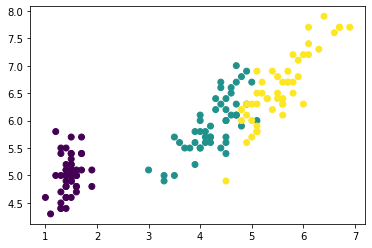

In [16]:
import matplotlib.pyplot as plt
petal_length = df[['petal_length']]
sepal_length = df[['sepal_length']]
species_categories = pd.Categorical(df['species'])
plt.scatter(petal_length, sepal_length, c=species_categories.codes)
plt.show()

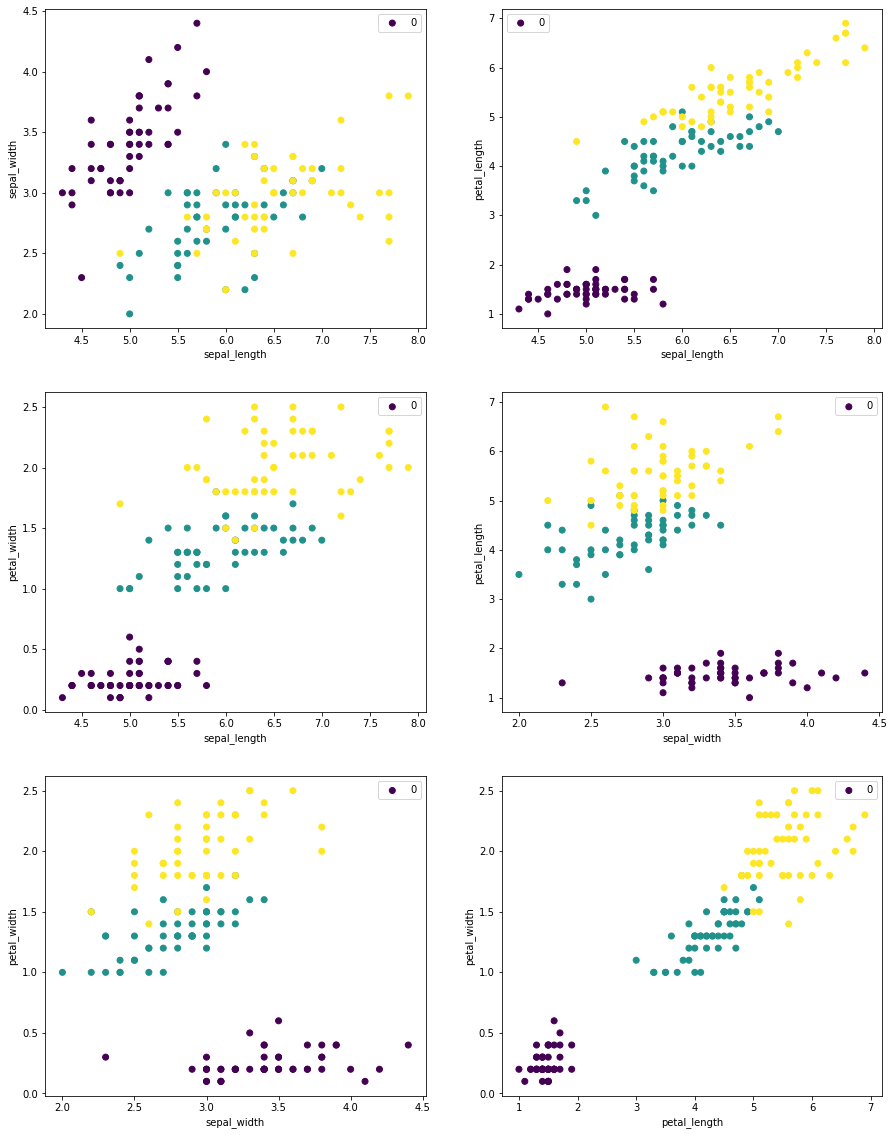

In [44]:
from itertools import combinations

species_categories = pd.Categorical(df['species'])

attributes = df.columns[:-1]
all_attribute_combinations = [attr_pair for attr_pair in combinations(attributes, 2)]
n = len(all_attribute_combinations) // 2
fig, axs = plt.subplots(n, 2, figsize=(15,20))

for i, ax in enumerate(fig.axes):
    attr_comb = all_attribute_combinations[i]
    
    petal_length = df[[attr_comb[0]]]
    sepal_length = df[[attr_comb[1]]]
    
    ax.scatter(petal_length, sepal_length, 
               c=species_categories.codes)
    ax.set_xlabel(attr_comb[0])
    ax.set_ylabel(attr_comb[1])

plt.show()